In [ ]:
!pip install pytesseract
!apt-get install tesseract-ocr
!pip install pillow
!pip install tensorflow
!pip install keras
!pip install matplotlib


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 45 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 0s (12.3 MB/s)
Selecting previously unselected package tesseract-ocr-eng.
(Reading database ... 121913 files and directories currently installed.)
Preparing to unpack .../tesseract-ocr-e

In [ ]:
!apt-get install tesseract-ocr
!pip install pytesseract

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 45 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 1s (6,130 kB/s)
Selecting previously unselected package tesseract-ocr-eng.
(Reading database ... 121926 files and directories currently installed.)
Preparing to unpack .../tesseract-ocr-

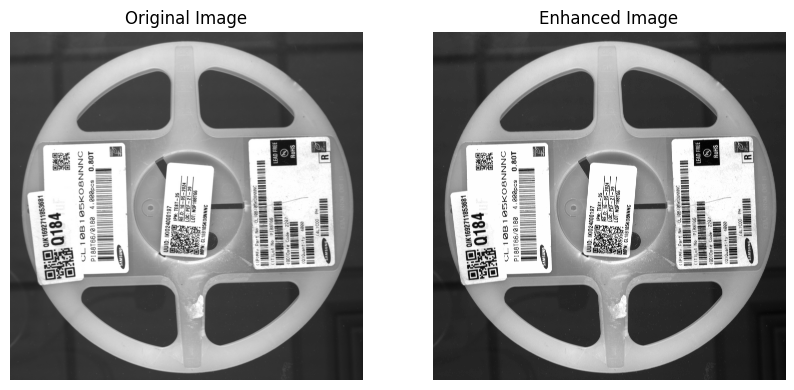

Processing complete. Enhanced image image_2000.jpg saved to output directory.


In [9]:
import os
import cv2
import json
import pytesseract
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Set the path to the Tesseract executable
pytesseract.pytesseract.tesseract_cmd = '/usr/bin/tesseract'

#pre-trained FSRCNN model
model_path = '/content/drive/MyDrive/FSRCNN_x4.pb'

if not os.path.exists(model_path):
    # Download the model file if it does not exist
    url = 'https://github.com/opencv/opencv_extra/raw/master/testdata/dnn/fsrcnn_x4.pb'
    import urllib.request
    urllib.request.urlretrieve(url, model_path)

def enhance_image_with_fsrcnn(image):
    # Load the FSRCNN model
    sr = cv2.dnn_superres.DnnSuperResImpl_create()
    sr.readModel(model_path)
    sr.setModel("fsrcnn", 4)  # Use FSRCNN with scale factor 4

    # Enhance the image
    enhanced_image = sr.upsample(image)
    return enhanced_image

# Function to read OCR
def ocr_core(image):
    text = pytesseract.image_to_string(image)
    return text

# Function to extract and save OCR text
def extract_and_save_info(ocr_text, image_name, output_path):
    info = {
        "OCR_Text": ocr_text,
    }

    # Save info to a JSON file
    output_json_path = os.path.join(output_path, f"extracted_info_{image_name}.json")
    with open(output_json_path, 'w') as f:
        json.dump(info, f, indent=4)

    return info

#process a single image
def process_image(image_path, output_image_path, output_path):
    try:
        # Read the image
        original_image = cv2.imread(image_path)

        gray_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)

        enhanced_image = enhance_image_with_fsrcnn(gray_image)

        pil_image = Image.fromarray(enhanced_image)
        ocr_text = ocr_core(pil_image)

        # Save the enhanced image
        cv2.imwrite(output_image_path, enhanced_image)

        image_name = os.path.basename(image_path)
        extract_and_save_info(ocr_text, image_name, output_path)

        # Display the original and enhanced image
        plt.figure(figsize=(10, 5))

        plt.subplot(1, 2, 1)
        plt.title("Original Image")
        plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
        plt.axis('off')

        plt.subplot(1, 2, 2)
        plt.title("Enhanced Image")
        plt.imshow(enhanced_image, cmap='gray')
        plt.axis('off')

        plt.show()

        print(f"Processing complete. Enhanced image {image_name} saved to output directory.")
        return enhanced_image

    except Exception as e:
        print(f"Error processing image {image_path}: {e}")
        return None

# Main function
def main_single_image(image_path, output_path):
    if not os.path.exists(image_path):
        print(f"Image {image_path} does not exist.")
        return

    image_name = os.path.basename(image_path)
    output_image_path = os.path.join(output_path, f"enhanced_{image_name}")

    # Process the image
    process_image(image_path, output_image_path, output_path)

if __name__ == "__main__":
    image_path = '/content/drive/MyDrive/dataset_images/images/image_2000.jpg'  # Path to a single image
    output_path = '/content/drive/MyDrive/op'
    os.makedirs(output_path, exist_ok=True)
    main_single_image(image_path, output_path)
